1. Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

--- 0.004000663757324219 seconds without order ---


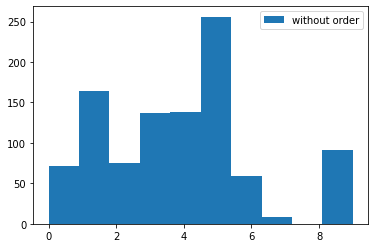

--- 0.003999233245849609 seconds with order ---


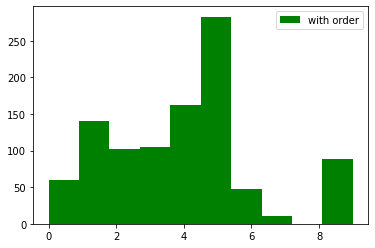

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
def p(b=np.array([-1,0.12, 0.42, 0.587, 0.827,1.137,1.677,1.788,1.808,1.809,2.1])):
    c=np.random.rand()*2.009 
    for i in range (10): 
        if(b[i]< c <= b[i+1]):
          return i
def p_or(a = np.array([5,4,1,3,9,2,0,6,7,8]),b=np.array([-1,0.54,0.85,1.15,1.39,1.59,1.757,1.877,1.988,2.008,2.1])):
    c=np.random.rand()*2.009 
    for i in range (10): 
        if(b[i]< c <= b[i+1]):
          return a[i]
start_time = time.time()
random1 = [p() for i in range(1000)]
t1 = time.time() - start_time
start_time = time.time()
random2 = [p_or() for i in range(1000)]
t2 = time.time() - start_time
random1[:10]
random2[:10]
print("--- %s seconds without order ---" % (t1))
plt.hist(random1,label="without order")
plt.legend()
plt.show()
print("--- %s seconds with order ---" % (t2))
plt.hist(random2, color = "g", label="with order")
plt.legend()
plt.show()

2. Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

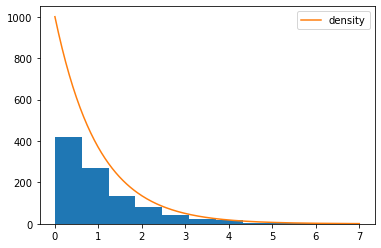

In [9]:
import math

def f (x,s): 
    return - (math.log(1-x))/s

Sample=np.zeros(1000) 
l=1 
X=np.linspace(0, 7, 256) 
for i in range (1000): 
    d=random.random() 
    Sample[i]=f(d,l) 
 
T=1000*np.exp(-X) 
plt.hist(Sample) 
plt.plot(X,T, label='density') 
plt.legend() 
plt.show()

3. Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

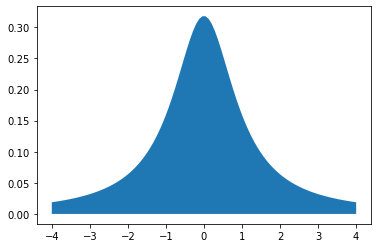

In [10]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

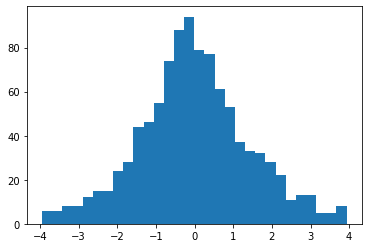

In [11]:
#Solution
import math

def f1 (x):
    return (1/(math.pi*(1 + x*x)))

x = np.zeros(1000)
i = 0
while i<1000: 
    d=random.uniform(-4,4) 
    y=random.random() 
    if(y < f1(d)): 
        x[i]=d
        i=i+1
plt.hist(x,30)
plt.show()


4. Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

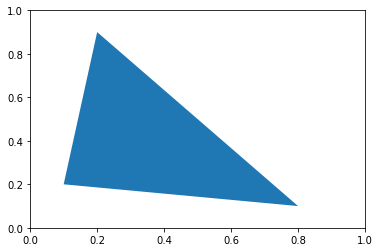

In [12]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

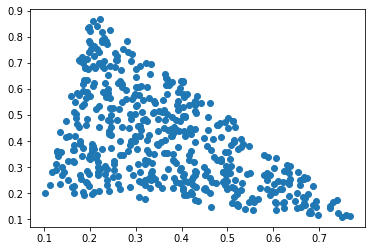

In [13]:
#Solution
rand=np.random.rand(500,2)
s=rand.sum(axis=1)
m=s>1
np.place(rand[:,0], m, 1-rand[m][:,0])
np.place(rand[:,1], m, 1-rand[m][:,1])
A=np.array([7/np.sqrt(50),1/np.sqrt(50),-1/np.sqrt(50),7/np.sqrt(50)]).reshape(2,2)
rand=np.matmul(A,rand.T).T
rand=rand*np.sqrt(50)/10+np.array([0.1,0.2])
plt.scatter(rand[:,0],rand[:,1])
plt.show()

5. Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

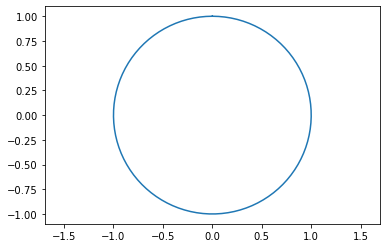

In [14]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

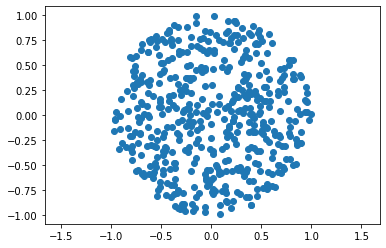

In [15]:
#Solution
rand=np.random.rand(500,2)
x=np.sqrt(rand[:,1])*np.cos(2*np.pi*rand[:,0])
y=np.sqrt(rand[:,1])*np.sin(2*np.pi*rand[:,0])
plt.scatter(x,y)
plt.axis('equal')
plt.show()

6. Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

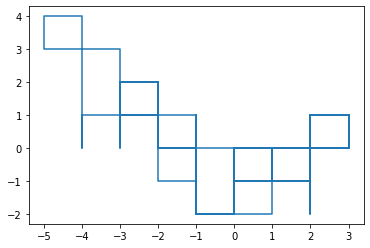

In [16]:
x1=np.sort(np.random.randint(0, 51, 50)) + np.arange(50)
y1=np.sort(np.random.randint(0, 51, 50)) + np.arange(50)
x2 =np.full(100, 1)
x2[-x1]=-1
y2=np.full(100, 1)
y2[-y1] = -1
x2=x2.cumsum()
y2=y2.cumsum()
x=(x2+y2)/2
y=(x2-y2)/2

np.insert(x, 0, 0)
np.insert(y, 0, 0)
plt.plot(x, y)
plt.show()

7. Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

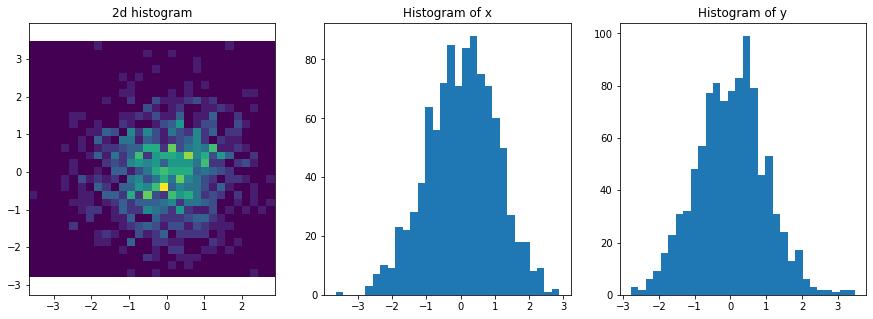

In [17]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

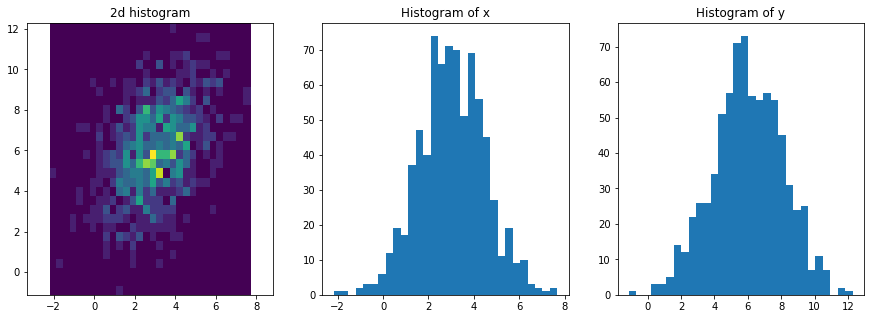

In [18]:
#Solution
n = 0
x = []
y = []
while(n < 1000):
    u = random.uniform(-1, 1)
    t = random.uniform(-1, 1)
    s = u*u+t*t
    if(s > 0 and s <= 1):
        x.append(u * math.sqrt(-2 * math.log(s) / s))
        y.append(t * math.sqrt(-2 * math.log(s) / s))
    n = n + 1
x = np.array(x)
y = np.array(y)
y *= math.sqrt(7 / 2)
y += 1 / math.sqrt(2) * x
x *= math.sqrt(2)
x += 3
y += 6
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

8. Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.

In [19]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])
N = np.zeros((8,1))
for i in range (8):
    N[i] = np.random.normal(0,1,1)
C = np.linalg.cholesky(B[:8, :8])
string = (C[0:1] + C[4:5])*(-1)
G = np.concatenate((C, string), axis = 0)
L = np.concatenate((G, np.zeros((9,1))), axis = 1)
print(np.dot(L,L.T))

[[ 2.  0.  0.  0. -1.  0.  0.  0. -1.]
 [ 0.  4.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  4.  0.  0.  0. -1.  0.  0.]
 [ 0. -1.  0.  4.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  2.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  4.  0. -1.  0.]
 [ 0.  0. -1.  0.  0.  0.  4.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  4.  0.]
 [-1.  0.  0.  0. -1.  0.  0.  0.  2.]]


9. С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число  π . Теоретически обоснуйте необходимое число бросаний, чтобы оценить число  π  с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

In [24]:
N = 1000000
x, y = np.random.rand(2, N)
4*len(np.where( x*x + y*y <= 1)[0])/N

3.141492

10. Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

Подсказка 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Подсказка 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [26]:
def gen_subset(n):
    p = np.zeros(n)
    f = 1
    for i in range(n):
        f *= (i + 1)
        p[i] = (i + 1)**n / f
    p /= p.sum()
    size=1000
    num_groups = np.random.choice(np.arange(1, n + 1), p=p, size=size)
    a = np.zeros((size, n))
    for i in range(size):
        a[i, :] = np.random.choice(np.arange(1, num_groups[i] + 1), size=n)
    return a
gen_subset(100).max(axis=1).mean()

29.73